In [223]:
import numpy as np  # Allows us to work with arrays.
import matplotlib.pyplot as plt  # Allows working with plots.
import pandas as pd  # importing pandas’ library for use. Allows us to import data set and manipulate it.

import seaborn as sns  # Allows to polt beautiful plots.
import matplotlib.pyplot as plt # plotting.
from mpl_toolkits import mplot3d


#from sklearn.compose import ColumnTransformer  # helps with encoding.
from sklearn.preprocessing import OneHotEncoder  # Does onehotencode.
from sklearn.preprocessing import LabelEncoder   # Does 1 and 0 encoding.
from sklearn.model_selection import train_test_split  # Splits dataset into test set and traning set. 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
  # Perform the feature scaling.
from sklearn.linear_model import LogisticRegression  # Performs logistic regression.
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # creates a confusion matrix
from sklearn.metrics import accuracy_score  # Returns accury score of a model.
#from sklearn.neighbors import KNeighborsClassifier  # performs K Neariesst Neighobour.
#from sklearn.impute import KNNImputer  # imputes missing values using KNN.
from sklearn.svm import SVC  # Performs svm
from sklearn.naive_bayes import GaussianNB  # performs naive_bayes gaussianNB.
from sklearn.tree import DecisionTreeClassifier  #Perfroms decision tree classification model.
from sklearn.ensemble import RandomForestClassifier  #Performs random forest classification.
#from xgboost import XGBClassifier  # performs xgboost classification. gradiant decision trees.
from sklearn.linear_model import LinearRegression  # will use to replace missing values linear regressoin
from sklearn.decomposition import PCA  # Performs model optimization
from sklearn.decomposition import KernelPCA  # Performs model optimization
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA # performs model optimization
from sklearn.model_selection import cross_val_score  # performs cross validation. Helps in model selection.
from sklearn.model_selection import GridSearchCV  # helps select the best hyper parameters
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

#%matplotlib inline  # helps in showing plots on the browser.

In [172]:
df = pd.read_csv("iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [173]:
df = df.drop('Id', 1)

In [174]:
df = df.set_axis(["sepal length", "sepal width", "petal length", "petal width", "Class"],axis=1)

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [176]:
le = LabelEncoder()
df["Class"] = le.fit_transform(df["Class"])

In [177]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [229]:
def pcafuntion(X,pcomponents ,pcolumns, y_value, y_var, plot_labels):  # A function to perfrom PCA with paramenters given.
    # Normalizing data before applying pca
    sc = StandardScaler()  # creating an instance of the object.
    X = sc.fit_transform(X)   # selecting vaues to perfom transformation on  
    
    pca = PCA(n_components=pcomponents)  # selecting number of principal components
    principalComponents = pca.fit_transform(X)  #  # selecting values to perfom transformation on  
    principalDf = pd.DataFrame(data = principalComponents  # creating a new dataframe with principal components.
                 , columns =pcolumns)
    finalDf = pd.concat([principalDf, y_value], axis = 1)  # concnating principal componenets with Class.
    print(finalDf)  # looking at the out put from pca.
    print("\n",pca.explained_variance_ratio_)# shows how much information is reatined from the pca
    print(pca.components_)

    missing = 0  # setting variable to 0.
    for i in range(len(pca.explained_variance_ratio_)):  # for looping in length of the array pca.explained_variance_ratio_
        missing = missing  + pca.explained_variance_ratio_[i]  # adding pca.explained_variance_ratio_[i] 
                                                              # varables values to missing variable
    print("Total values :  ", missing, "%")  # total data left 
    missing = 1 - missing  # subtracting missing variables value from 1.
    print("missing values :", missing, "%")  # total data lost
    
    
    
    if pcomponents == 2:  # checks the number of principal components.
        plot = sns.relplot(
            x='principal component 1', 
            y='principal component 2', 
            hue=y_var, 
            data=finalDf,
            facet_kws={'legend_out': False}
        )  # plots a scatter plot of principal components.

        plt.title('Dataset with pca')  # Title of the plot
        # check axes and find which is have legend
        leg = plot.axes.flat[0].get_legend()
        new_title =y_var  # Legend title.
        leg.set_title(new_title)  # setting title to legend.
        leg.get_frame().set_alpha(255) # setting transparency level for legend box
        labels = plot_labels  # label list for legend
        for t, l in zip(plot._legend.texts, labels):  # looping through a touple.
            t.set_text(l)  # adding label to list
    
    elif pcomponents == 3:  # checks the number of principal components.
        
        fig = plt.figure(figsize=(15,10))  # setting plot size
        ax = plt.axes(projection='3d')  # specifying that it is a 3d plot.
        plt.title('Dataset with pca', fontsize=20)  # adding a title to the plot
        # Data for three-dimensional scattered points
        xdata = finalDf['principal component 1']  # selecting first princal component.
        ydata = finalDf['principal component 2']  # selecting second princal component.
        zdata = finalDf['principal component 3']  # selecting third princal component.
        ax.scatter3D(xdata, ydata, zdata, c=y_value)  # plotting princhpla components

        ax.set_xlabel("First Principal Component",fontsize=15)  # setting label for first principal componenet.
        ax.set_ylabel("Second Principal Component",fontsize=15)  # setting label for second principal componenet.
        ax.set_zlabel("Third Principal Component",fontsize=15)  # setting label for third principal componenet.

        plt.show()  # making plot visible.
        
        return finalDf  # returning finalDf


     principal component 1  principal component 2  principal component 3  \
0                -2.264542               0.505704              -0.121943   
1                -2.086426              -0.655405              -0.227251   
2                -2.367950              -0.318477               0.051480   
3                -2.304197              -0.575368               0.098860   
4                -2.388777               0.674767               0.021428   
..                     ...                    ...                    ...   
145               1.870522               0.382822               0.254532   
146               1.558492              -0.905314              -0.025382   
147               1.520845               0.266795               0.179277   
148               1.376391               1.016362               0.931405   
149               0.959299              -0.022284               0.528794   

     Class  
0        0  
1        0  
2        0  
3        0  
4        0  
..     ..

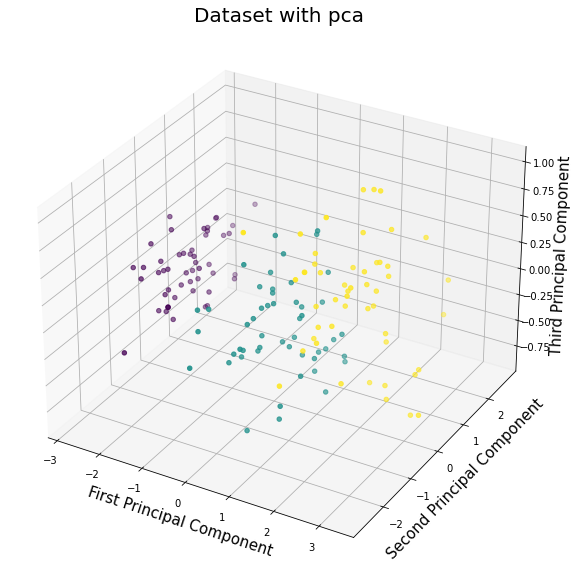

,principal component 1,principal component 2,principal component 3,Class
0,-2.264542,0.505704,-0.121943,0
1,-2.086426,-0.655405,-0.227251,0
2,-2.367950,-0.318477,0.051480,0
3,-2.304197,-0.575368,0.098860,0
4,-2.388777,0.674767,0.021428,0
...,...,...,...,...
145,1.870522,0.382822,0.254532,2
146,1.558492,-0.905314,-0.025382,2
147,1.520845,0.266795,0.179277,2
148,1.376391,1.016362,0.931405,2


In [230]:
pcafuntion(X,3 ,['principal component 1','principal component 2','principal component 3'], finalDf['Class'], "Class", ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

     principal component 1  principal component 2  Class
0                -2.264542               0.505704      0
1                -2.086426              -0.655405      0
2                -2.367950              -0.318477      0
3                -2.304197              -0.575368      0
4                -2.388777               0.674767      0
..                     ...                    ...    ...
145               1.870522               0.382822      2
146               1.558492              -0.905314      2
147               1.520845               0.266795      2
148               1.376391               1.016362      2
149               0.959299              -0.022284      2

[150 rows x 3 columns]

 [0.72770452 0.23030523]
Total values :   0.9580097536148197 %
missing values : 0.04199024638518034 %


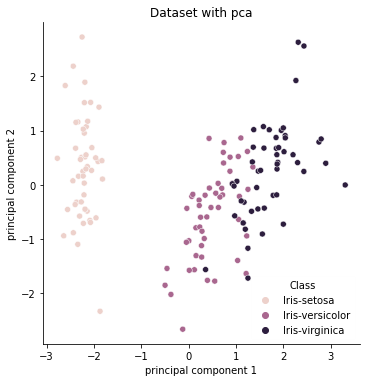

In [226]:
pcafuntion(X,2 ,['principal component 1','principal component 2'], df[["Class"]], "Class", ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])